# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

## Comments

Q1 -> Good
Q2 -> Good
Q3 -> Good
Q4 -> Good
Q5 -> Good
Q6 -> Good
Q7 -> Good
Q8 -> df.hist() is a useful command to get quick distribution plots of all the columns
Q9  -> We do meet the normal distribution requirement even though GPA and GRE are skewed toward the upper ranges.
Q10 -> Good
Q11 -> Good
Q12 -> Good
Q13 -> Good
Q14 -> Good

### Step 1: Load the python libraries you will need for this project 

In [13]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [14]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [17]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the GRE is measured on a different scale (out of 800) than the GPA (out of 4)

#### Question 4. Drop data points with missing data


In [18]:
df_nomissing = df_raw.dropna()
df_nomissing.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: As seen above, I ran a count of the new dataframe called 'df_nomissing'. The count values of 397 are different from the ones ran earlier (where the highest row count was 400), and is a confirmation that rows with missing values have been dropped.

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1132cb150>],
 'caps': [<matplotlib.lines.Line2D at 0x1132cbf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1132ec2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1132e0c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1132cb290>,
  <matplotlib.lines.Line2D at 0x1132cb950>]}

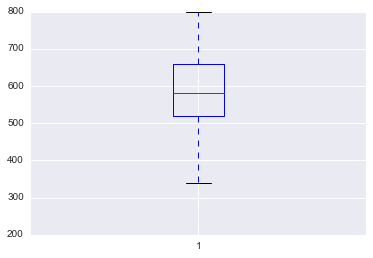

In [19]:
#boxplot GRE
plt.boxplot(df_nomissing['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x118fd3650>],
 'caps': [<matplotlib.lines.Line2D at 0x118fe24d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x118fee7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118fee190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118fd3790>,
  <matplotlib.lines.Line2D at 0x118fd3e50>]}

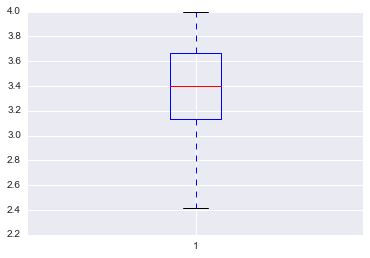

In [20]:
#boxplot GPA
plt.boxplot(df_nomissing['gpa'])

#### Question 7. What do this plots show?

Answer: These plots show the spread of scores, starting from the minimum score at the very bottom. The line in red is the median, and the botton edge of the box (blue) is the 2nd quartile, the top edge of the box (blue) is the 3rd quartile, and the top of the graph is the max score.

#### Question 8. Describe each distribution 

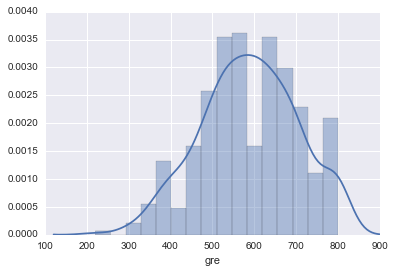

In [21]:
# plot the distribution of each variable 
sns.distplot(df_nomissing['gre'])

In [22]:
df_nomissing['gre'].skew()

-0.146046988215597

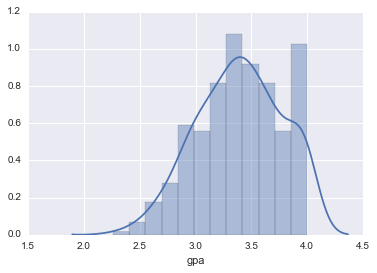

In [23]:
sns.distplot(df_nomissing['gpa'])

In [24]:
df_nomissing['gpa'].skew()

-0.21688893296924305

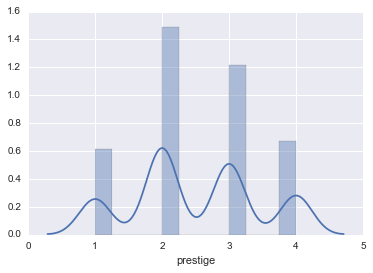

In [25]:
sns.distplot(df_nomissing['prestige'])

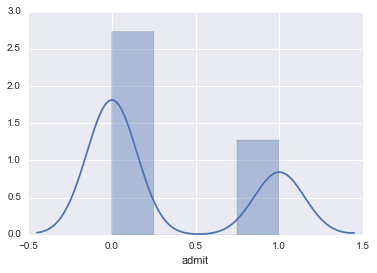

In [26]:
sns.distplot(df_nomissing['admit'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The model does not meet the assumption of a normal distribution because the skewness of a normal distribution is zero. However, in our case the skew is -0.146 for GRE, and -0.217 for GPA

Prestige is defiintely not normally distributed because it only has discrete values

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, it does not because the skew is within reasonable range

#### Question 11. Which of our variables are potentially colinear? 

In [27]:
# create a correlation matrix for the data
#GRE and GPA may be potentially colinear
df_nomissing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


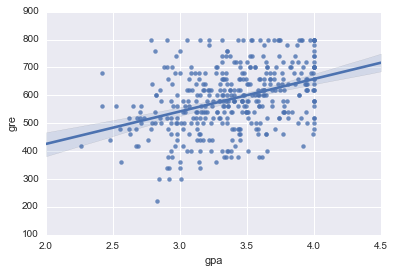

In [33]:
sns.regplot(x=df_nomissing['gpa'], y = df_nomissing['gre'])

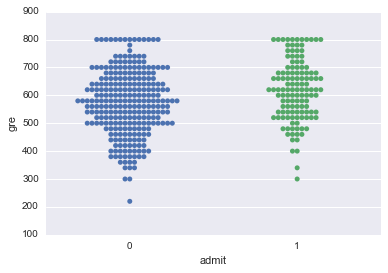

In [28]:
sns.swarmplot(x=df_nomissing['admit'], y=df_nomissing['gre'])

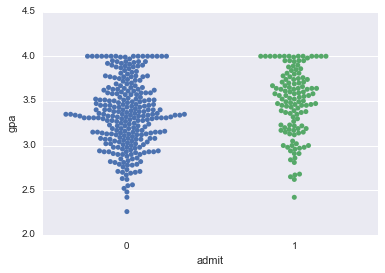

In [29]:
sns.swarmplot(x=df_nomissing['admit'], y=df_nomissing['gpa'])

#### Question 12. What did you find?

Answer: There is a low correlation between GPA and GRE (0.382408 -- suggesting colienarity), as suspected, because these are both indicative of one's academic potential.


(Just for the record, I personally don't like the GPA or the GRE as indicators of success)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We can use a regression with prestige on the y-axis, and admit status on the x-axis to plot the distribution of admit status by prestige, and inspect if there's a difference in admit status by alma mater prestige.

A regression can help us determine if there is an correlation and how strong it is. Beacuse prestige includes 4 discrete variables, we can use dummy variables to create a regression model.

#### Question 14. What is your hypothesis? 

Answer: N0 = Admit rate is not dependent on a combination of GRE, GPA and undergrad prestige
Na = Admit rate is dependent on some combination of GRE, GPA and undergrad prestige

I expect to reject the null hypothesis.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

1) Instead of dropping the oversrvations, one could replace them with the mean of the remainder of the column.

2) One could "pad" the missing observations with observations immediately below or above.

#### 2. Bonus: Log transform the skewed data

In [58]:
df_logGRE = df_nomissing['gre'].apply(np.log10)
df_logGPA = df_nomissing['gpa'].apply(np.log10)

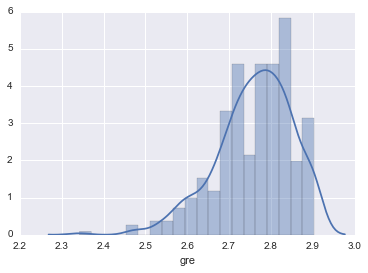

In [49]:
sns.distplot(df_logGRE.dropna())

In [50]:
df_logGRE.skew() #my skew values have not improved...

-0.76062969651039569

In [59]:
df_logGPA.skew()

-0.47565055547360813

#### 3. Advanced: Impute missing data